In [25]:
%load_ext autoreload
%autoreload 2

from codes.Kalman import *
from scipy.integrate import odeint

%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16, 9)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [26]:
### IMPORTANT PARAMETERS

# index of the unobserved component
i_unobs_comp = 0

# variance of the random white noise added to the unobserved component in the initial catalog
variance_unobs_comp = 0.05

# variance of the observations used to generate the catalog and used in the Kalman smoother
variance_obs_comp = 0.0001

# number of Lorenz-63 times
nb_loop = 50

# number of SEM iterations
nb_iter_SEM = 50

In [27]:
### GENERATE SIMULATED DATA

# Lotka-Volterra dynamical model
def Lotka_Volterra(x, dx, alpha, beta, gamma, delta):
    dx = zeros((2))
    dx[0] = alpha*x[0]-beta*x[0]*x[1]
    dx[1] = delta*x[0]*x[1]-gamma*x[1]
    return dx

# Lotka-Volterra parameters
x0 = array([1, 1]) # initial condition
dt = 0.1 # integration time step
alpha = 2.0/3; beta = 4.0/3; gamma = 1.0; delta = 1.0 # physical parameters

# time and truth
t   = arange(0.01, nb_loop, dt)
x_t = odeint(Lotka_Volterra, x0, arange(0.01, nb_loop, dt), args=(alpha, beta, gamma, delta))

# observations
y = x_t.copy()
y = delete(y, i_unobs_comp, axis=1)
### ADD NOISE HERE? ###

### V1: $x = [x_2, x_3, z_1]$

Text(0.5, 1.0, 'Initial x')

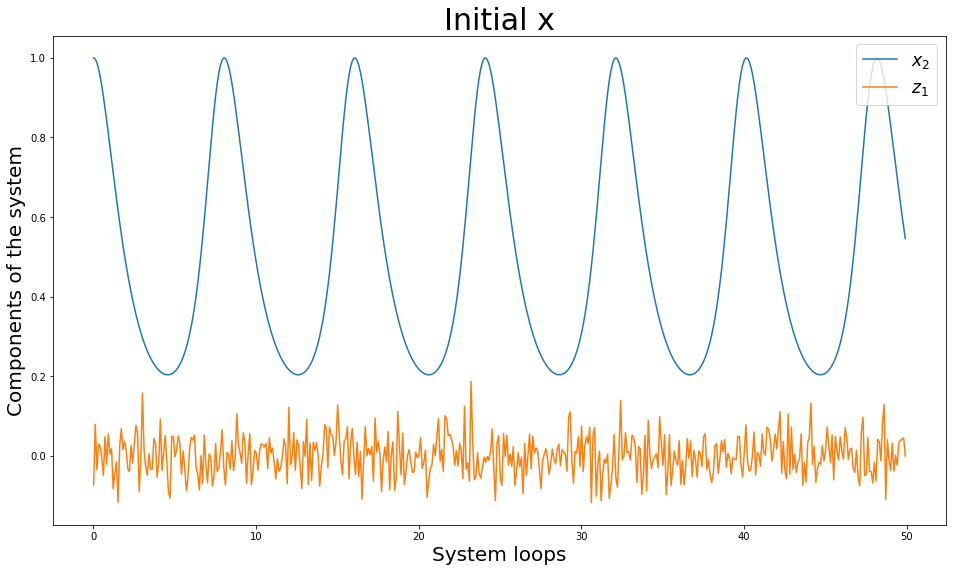

In [28]:
# state
z = random.normal(loc=x_t[:,i_unobs_comp]*0, scale=variance_unobs_comp, size=shape(y)[0])
x = c_[y[:,0], z]

# shapes
n = shape(x)[1]
p = shape(y)[1]

# colors and labels of the components
tab_colors = ['tab:blue', 'tab:orange']
tab_labels = ['$x_2$', '$z_1$']

# plot the components
plot(t, x)
xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
legend(tab_labels, loc=1, fontsize='xx-large')
title('Initial x', size=30)

In [29]:
# kalman parameters
H = delete(eye(n), 1, axis=0)
R = variance_obs_comp*eye(p)

# stochastic EM
x_s_V1, P_s_V1, M_V1, tab_loglik_V1, x = Kalman_SEM(x, y, H, R, nb_iter_SEM)

100%|██████████| 50/50 [00:04<00:00, 11.02it/s]


Text(0.5, 1.0, 'Final x')

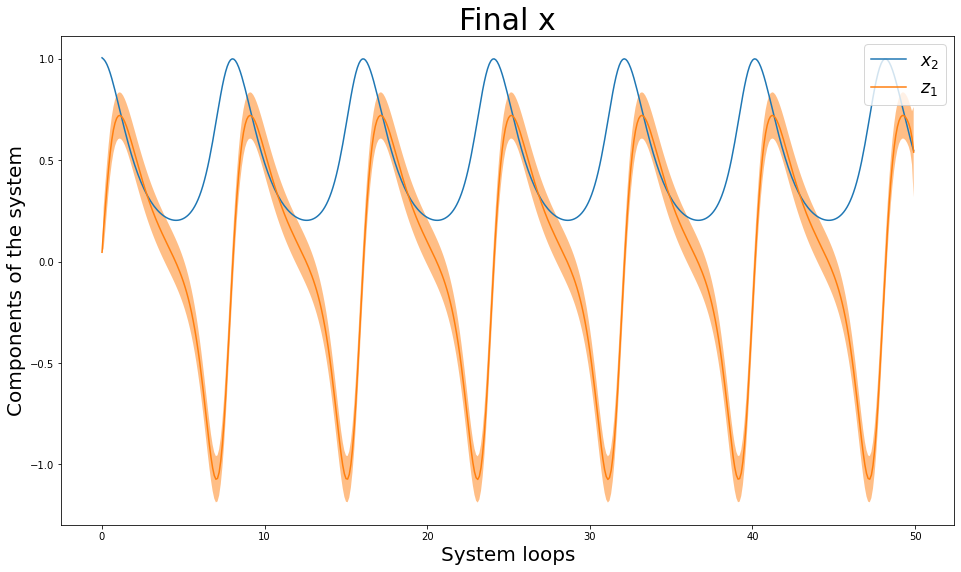

In [30]:
# plot the reconstructed components
for i in range(n):
    plot(t, x_s_V1[:,i], color=tab_colors[i])
    fill_between(t, x_s_V1[:,i]-1.96*P_s_V1[:,i,i], x_s_V1[:,i]+1.96*P_s_V1[:,i,i],
                 facecolor=tab_colors[i], alpha=0.50)

xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
legend(tab_labels, loc=1, fontsize='xx-large')
title('Final x', size=30)

### V2: $x = [x_2, x_3, z_1, z_2]$

Text(0.5, 1.0, 'Initial x')

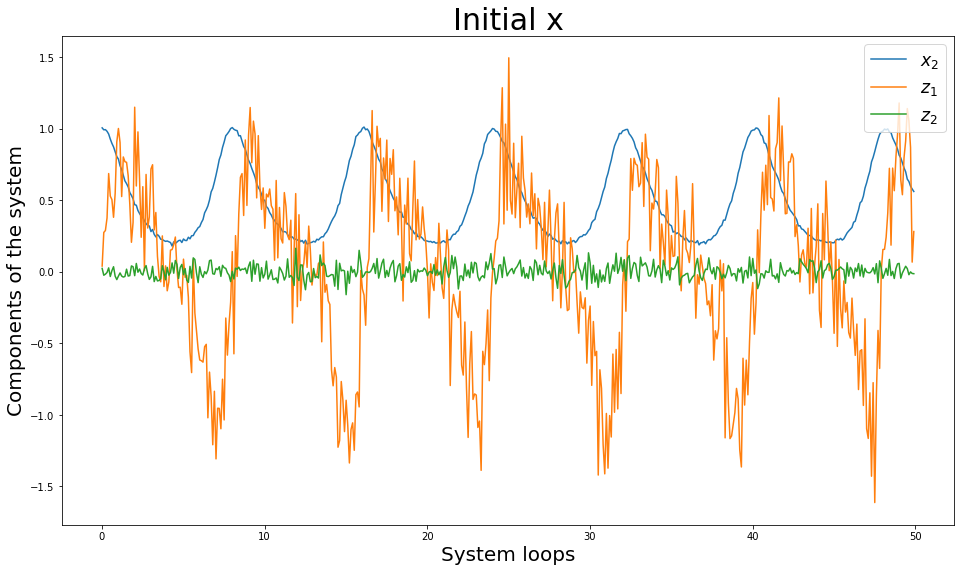

In [31]:
# state
z = random.normal(loc=x_t[:,i_unobs_comp]*0, scale=variance_unobs_comp, size=shape(y)[0])
x = c_[x, z]

# shapes
n = shape(x)[1]
p = shape(y)[1]

# colors and labels of the components
tab_colors = ['tab:blue', 'tab:orange', 'tab:green']
tab_labels = ['$x_2$', '$z_1$', '$z_2$']

# plot the components
plot(t, x)
xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
legend(tab_labels, loc=1, fontsize='xx-large')
title('Initial x', size=30)

In [32]:
# kalman parameters
H = delete(eye(n), [1,2], axis=0)
R = variance_obs_comp*eye(p)

# stochastic EM
x_s_V2, P_s_V2, M_V2, tab_loglik_V2, x = Kalman_SEM(x, y, H, R, nb_iter_SEM)

100%|██████████| 50/50 [00:03<00:00, 12.65it/s]


Text(0.5, 1.0, 'Final x')

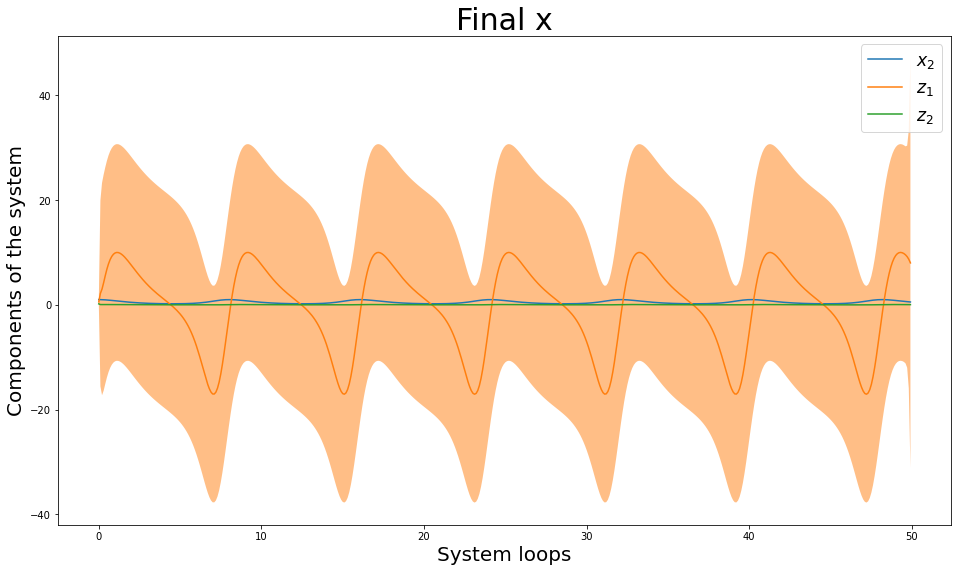

In [33]:
# plot the reconstructed components
for i in range(n):
    plot(t, x_s_V2[:,i], color=tab_colors[i])
    fill_between(t, x_s_V2[:,i]-1.96*P_s_V2[:,i,i], x_s_V2[:,i]+1.96*P_s_V2[:,i,i],
                 facecolor=tab_colors[i], alpha=0.50)

xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
legend(tab_labels, loc=1, fontsize='xx-large')
title('Final x', size=30)

### V3: $x = [x_2, x_3, z_1, z_2, z_3]$

Text(0.5, 1.0, 'Initial x')

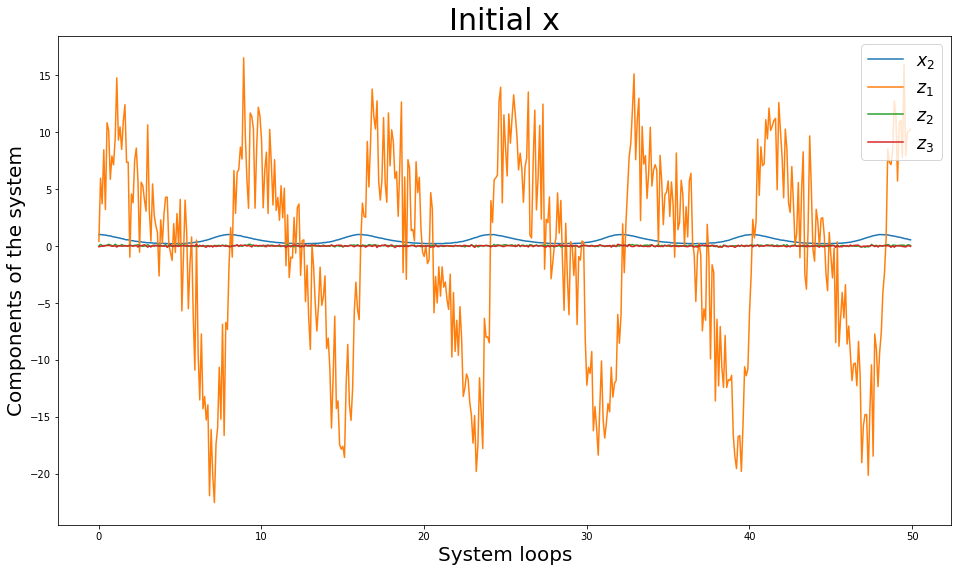

In [34]:
# state
z = random.normal(loc=x_t[:,i_unobs_comp]*0, scale=variance_unobs_comp, size=shape(y)[0])
x = c_[x, z]

# shapes
n = shape(x)[1]
p = shape(y)[1]

# colors and labels of the components
tab_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
tab_labels = ['$x_2$', '$z_1$', '$z_2$', '$z_3$']

# plot the components
plot(t, x)
xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
legend(tab_labels, loc=1, fontsize='xx-large')
title('Initial x', size=30)

In [35]:
# kalman parameters
H = delete(eye(n), [1,2,3], axis=0)
R = variance_obs_comp*eye(p)

# stochastic EM
x_s_V3, P_s_V3, M_V3, tab_loglik_V3, x = Kalman_SEM(x, y, H, R, nb_iter_SEM)

100%|██████████| 50/50 [00:05<00:00,  9.41it/s]


Text(0.5, 1.0, 'Final x')

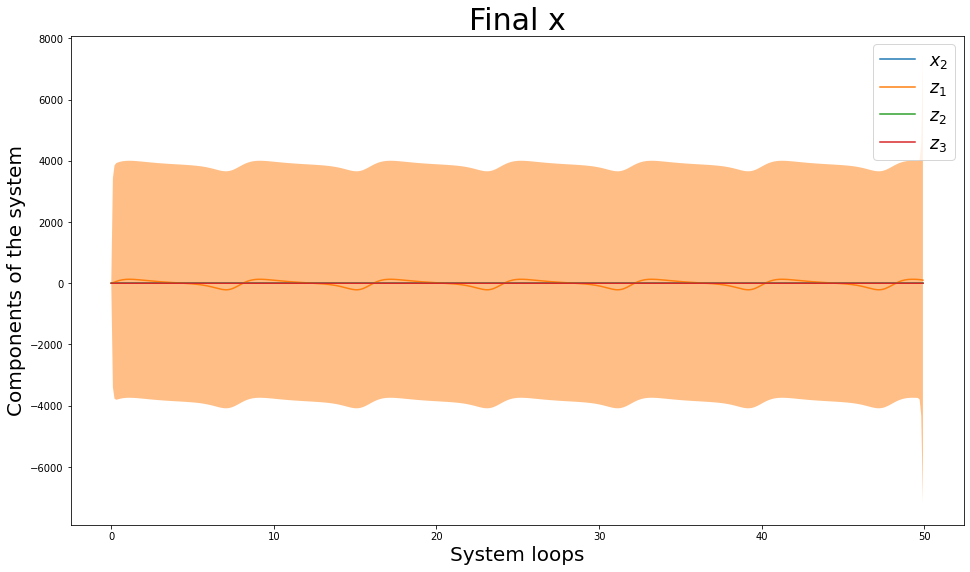

In [36]:
# plot the reconstructed components
for i in range(n):
    plot(t, x_s_V3[:,i], color=tab_colors[i])
    fill_between(t, x_s_V3[:,i]-1.96*P_s_V3[:,i,i], x_s_V3[:,i]+1.96*P_s_V3[:,i,i],
                 facecolor=tab_colors[i], alpha=0.50)

xlabel('System loops', size=20)
ylabel('Components of the system', size=20)
legend(tab_labels, loc=1, fontsize='xx-large')
title('Final x', size=30)

### Results interpretation

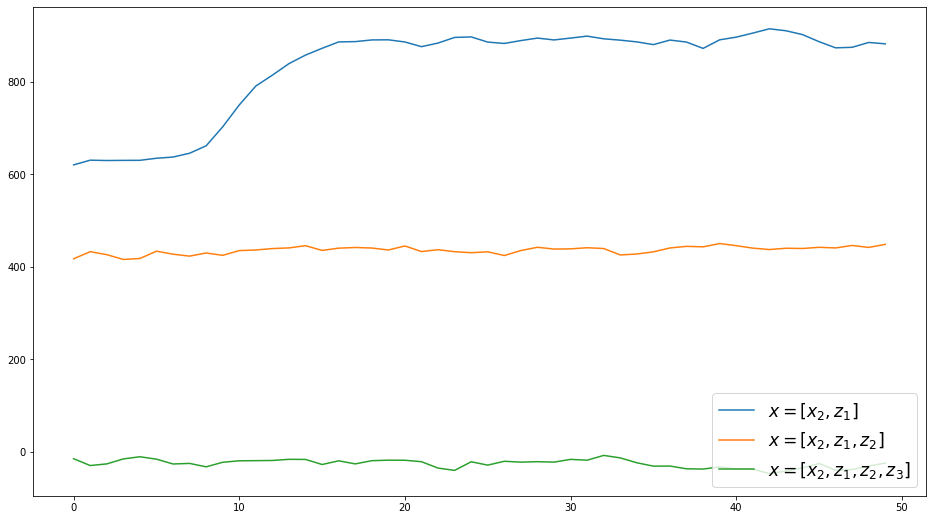

In [37]:
# check the log-likelihoods
plot(tab_loglik_V1)
plot(tab_loglik_V2)
plot(tab_loglik_V3)
legend(['$x = [x_2, z_1]$', '$x = [x_2, z_1, z_2]$', '$x = [x_2, z_1, z_2, z_3]$'], loc=4, fontsize='xx-large')

[ 1.50467528 -0.789632  ]


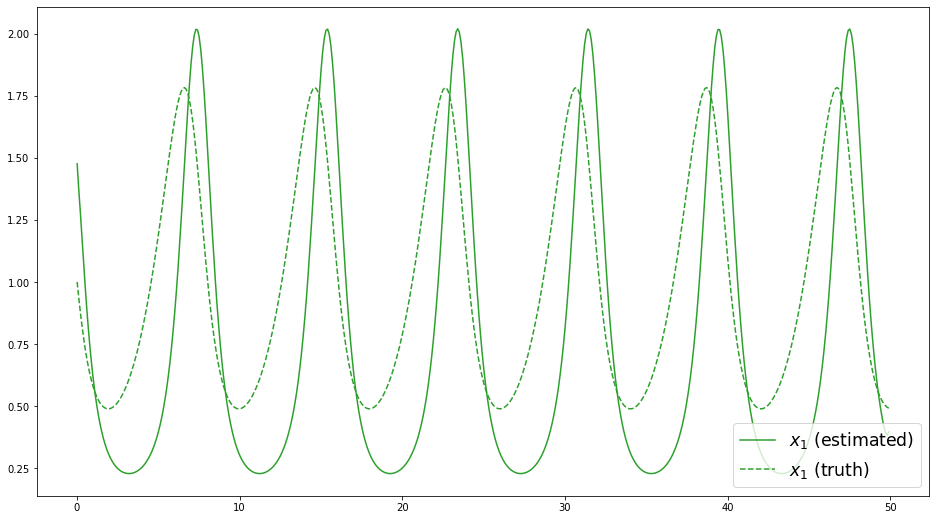

In [40]:
# regression between x_s (from V1) and x_1
regress = LinearRegression(fit_intercept=False).fit(x_s_V1, x_t[:,0])
x_hat = regress.predict(x_s_V1)

# plot reconstructed x_1
plot(t, x_hat, color='tab:green')
plot(t, x_t[:,0], '--', color='tab:green')
legend(['$x_1$ (estimated)', '$x_1$ (truth)'], loc=4, fontsize='xx-large')

# print regression coefficients
print(regress.coef_)

In [44]:
# write the ODEs (from V1)
print('V1 ODE coefficients:')
print(around((M_V1-eye(2))/dt, 1))

V1 ODE coefficients:
[[-0.  -0.4]
 [ 0.4 -1.8]]


In [45]:
1.8/0.4

4.5